# 1. Setup and Get Data

### 1.1 Install Dependencies and Setup

In [198]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

### 1.2 Collect Images Using OpenCV

In [199]:
import os
import time
import uuid
import cv2

In [200]:
# IMAGES_PATH = os.path.join('data','images')
# number_images = 30

In [201]:
# cap = cv2.VideoCapture(1)
# for imgnum in range(number_images):
#     print('Collecting image {}'.format(imgnum))
#     ret, frame = cap.read()
#     imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
#     cv2.imwrite(imgname, frame)
#     cv2.imshow('frame', frame)
#     time.sleep(0.5)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

### 1.3 Annotate Images with LabelMe

In [202]:
# !labelme

# 2. Review Dataset and Build Image Loading Function

### 2.1 Import TF and Deps

In [203]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

### 2.2 Limit GPU Memory Growth

In [204]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [205]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### 2.3 Load Image into TF Data Pipeline

In [206]:
images = tf.data.Dataset.list_files('./data/images/*.jpg')

In [207]:
images.as_numpy_iterator().next()

b'./data/images/1fe001d960030dad.jpg'

In [208]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [209]:
images = images.map(load_image)

In [210]:
images.as_numpy_iterator().next()

array([[[189, 207, 231],
        [189, 207, 231],
        [190, 208, 232],
        ...,
        [201, 219, 243],
        [201, 219, 243],
        [201, 219, 243]],

       [[189, 207, 231],
        [190, 208, 232],
        [190, 208, 232],
        ...,
        [201, 219, 243],
        [201, 219, 243],
        [201, 219, 243]],

       [[190, 208, 232],
        [190, 208, 232],
        [191, 209, 233],
        ...,
        [201, 219, 243],
        [201, 219, 243],
        [201, 219, 243]],

       ...,

       [[162, 157, 161],
        [162, 157, 161],
        [162, 157, 161],
        ...,
        [173, 179, 195],
        [173, 179, 195],
        [173, 179, 195]],

       [[162, 157, 161],
        [162, 157, 161],
        [162, 157, 161],
        ...,
        [175, 178, 195],
        [175, 178, 195],
        [175, 178, 195]],

       [[163, 158, 162],
        [163, 158, 162],
        [163, 158, 162],
        ...,
        [175, 178, 195],
        [175, 178, 195],
        [175, 178, 195]]

In [211]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

### 2.4 View Raw Images with Matplotlib

In [212]:
image_generator = images.batch(4).as_numpy_iterator()

In [213]:
plot_images = image_generator.next()

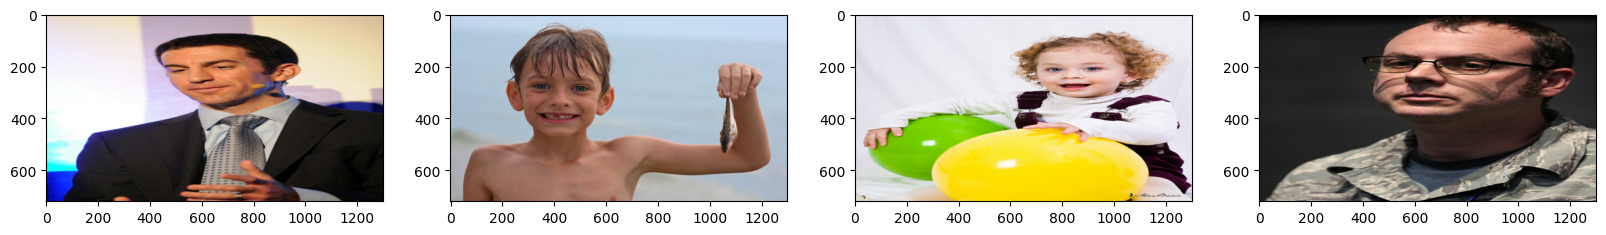

In [214]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

# 3. Partition Unaugmented Data

### 3.1 MANUALLY SPLT DATA INTO TRAIN TEST AND VAL

In [215]:
90*.7 # 63 to train

62.99999999999999

In [216]:
90*.15 # 14 and 13 to test and val

13.5

### 3.2 Move the Matching Labels

In [217]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('./data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('./data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('./data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

# 4. Apply Image Augmentation on Images and Labels using Albumentations

### 4.1 Setup Albumentations Transform Pipeline

In [218]:
import albumentations as alb

In [219]:
# augmentor = alb.Compose([
#     alb.RandomCrop(width=450, height=450), 
#     alb.HorizontalFlip(p=0.5), 
#     alb.RandomBrightnessContrast(p=0.2),
#     alb.RandomGamma(p=0.2), 
#     alb.RGBShift(p=0.2), 
#     alb.VerticalFlip(p=0.5)
# ], bbox_params=alb.BboxParams(format='albumentations', label_fields=['class_labels']))


### 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [220]:
# img = cv2.imread(os.path.join('./data','train/images','1f362603b4abd68d.jpg'))


In [221]:
# with open(os.path.join('./data', 'train/labels', '1f362603b4abd68d.json'), 'r') as f:
#     label = json.load(f)

In [222]:
# label['shapes'][0]['points']

### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [223]:
# coords = [0,0,0,0]
# coords[0] = label['shapes'][0]['points'][0][0]
# coords[1] = label['shapes'][0]['points'][0][1]
# coords[2] = label['shapes'][0]['points'][1][0]
# coords[3] = label['shapes'][0]['points'][1][1]

In [224]:
# coords

In [225]:
# coords = list(np.divide(coords, [1300,720,640,480]))

In [226]:
coords

### 4.4 Apply Augmentations and View Results

In [227]:
# augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [228]:
# augmented['bboxes'][0][2:]

In [229]:
# augmented['bboxes']

In [230]:
# cv2.rectangle(augmented['image'], 
#               tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
#               tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
#                     (255,0,0), 2)

# plt.imshow(augmented['image'])

Normalized Coordinates: [0.16147488874761604, 0.07070707070707069, 0.49396058486967576, 0.6710284664830118]
Denormalized Bounding Box: [332, 0, 450, 302]


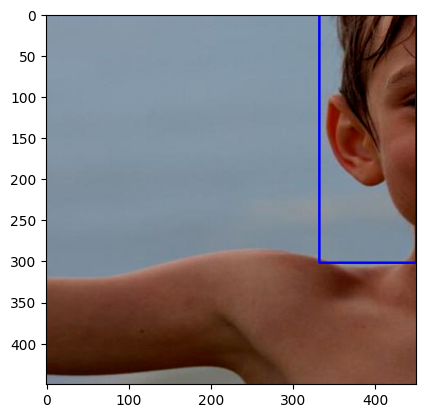

In [301]:
img_path = os.path.join('./data', 'train', 'images', '1f362603b4abd68d.jpg')
img = cv2.imread(img_path)

# Load the label
label_path = os.path.join('./data', 'train', 'labels', '1f362603b4abd68d.json')
with open(label_path, 'r') as f:
    label = json.load(f)

# Extract bounding box points
coords = label['shapes'][0]['points']
coords = [coord for point in coords for coord in point]  # Flatten the list

# Full image dimensions
img_width, img_height = 1300, 720

# Normalize the coordinates
normalized_coords = list(np.divide(coords, [img_width, img_height, img_width, img_height]))
print('Normalized Coordinates:', normalized_coords)

# Define the augmentor
augmentor = alb.Compose([
    alb.RandomCrop(width=450, height=450), 
    alb.HorizontalFlip(p=0.5), 
    alb.RandomBrightnessContrast(p=0.2),
    alb.RandomGamma(p=0.2), 
    alb.RGBShift(p=0.2), 
    alb.VerticalFlip(p=0.5)
], bbox_params=alb.BboxParams(format='albumentations', label_fields=['class_labels']))

# Apply augmentations
augmented = augmentor(image=img, bboxes=[normalized_coords], class_labels=['face'])

# Denormalize the augmented bounding box
augmented_bbox = augmented['bboxes'][0]
crop_width, crop_height = 450, 450

denormalized_bbox = [
    int(augmented_bbox[0] * crop_width),
    int(augmented_bbox[1] * crop_height),
    int(augmented_bbox[2] * crop_width),
    int(augmented_bbox[3] * crop_height)
]
print('Denormalized Bounding Box:', denormalized_bbox)

# Draw the rectangle
cv2.rectangle(augmented['image'], 
              (denormalized_bbox[0], denormalized_bbox[1]),
              (denormalized_bbox[2], denormalized_bbox[3]), 
              (255, 0, 0), 2)

# Display the image
plt.imshow(cv2.cvtColor(augmented['image'], cv2.COLOR_BGR2RGB))
plt.show()

# 5. Build and Run Augmentation Pipeline

### 5.1 Run Augmentation Pipeline

In [302]:
for partition in ['train', 'test', 'val']:
    image_dir = os.path.join('./data', partition, 'images')
    label_dir = os.path.join('./data', partition, 'labels')
    aug_image_dir = os.path.join('aug_data', partition, 'images')
    aug_label_dir = os.path.join('aug_data', partition, 'labels')

    # Create directories if they don't exist
    os.makedirs(aug_image_dir, exist_ok=True)
    os.makedirs(aug_label_dir, exist_ok=True)

    # Loop over each image in the partition
    for image in os.listdir(image_dir):
        img = cv2.imread(os.path.join(image_dir, image))

        # Initialize default coordinates
        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join(label_dir, f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            # Extract and normalize coordinates
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [1300, 720, 1300, 720]))

        try:
            # Apply augmentations 60 times
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

                # Save augmented image
                aug_image_path = os.path.join(aug_image_dir, f'{image.split(".")[0]}.{x}.jpg')
                cv2.imwrite(aug_image_path, augmented['image'])

                # Prepare annotation dictionary
                annotation = {}
                annotation['image'] = f'{image.split(".")[0]}.{x}.jpg'

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0, 0, 0, 0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 0

                # Save annotation
                aug_label_path = os.path.join(aug_label_dir, f'{image.split(".")[0]}.{x}.json')
                with open(aug_label_path, 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

### 5.2 Load Augmented Images to Tensorflow Dataset

In [303]:
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [304]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [305]:
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [306]:
train_images.as_numpy_iterator().next()

array([[[0.51023287, 0.34944853, 0.26317403],
        [0.503799  , 0.34301472, 0.25710785],
        [0.53811276, 0.37732843, 0.2939951 ],
        ...,
        [0.99607843, 0.99607843, 0.9882353 ],
        [0.99607843, 0.99822307, 0.9839461 ],
        [0.99417895, 0.99509805, 0.9833946 ]],

       [[0.54381126, 0.3791054 , 0.29283088],
        [0.5828431 , 0.41623774, 0.33272058],
        [0.5867647 , 0.41715688, 0.34264705],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 0.9922794 ],
        [0.9963848 , 0.9963848 , 0.98854166]],

       [[0.58431375, 0.40784314, 0.3254902 ],
        [0.615625  , 0.43915442, 0.36464462],
        [0.62941176, 0.45294118, 0.37843138],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 0.9970588 ]],

       ...,

       [[0.49215686, 0.38235295, 0.3       ],
        [0.5163603 , 0.39479166, 0.3163603 ],
        [0.51476717, 0

# 6. Prepare Labels

### 6.1 Build Label Loading Function

In [307]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

### 6.2 Load Labels to Tensorflow Dataset

In [308]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [309]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [310]:
val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [311]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.6323, 0.1432, 1.    , 0.7637], dtype=float16))

# 7. Combine Label and Image Samples

### 7.1 Check Partition Lengths

In [312]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(1080, 1080, 360, 360, 360, 360)

### 7.2 Create Final Datasets (Images/Labels)

In [313]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [314]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [315]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [316]:
# Iterate over the dataset and print some samples
for image, label in train.take(5):  # Take the first 5 samples
    print("Image shape:", image.shape)
    print("Label:", label)



Image shape: (8, 120, 120, 3)
Label: (<tf.Tensor: shape=(8, 1), dtype=uint8, numpy=
array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)>, <tf.Tensor: shape=(8, 4), dtype=float16, numpy=
array([[0.4417  , 0.001121, 1.      , 0.7944  ],
       [0.      , 0.      , 0.2471  , 0.2456  ],
       [0.      , 0.4714  , 0.485   , 1.      ],
       [0.8438  , 0.      , 1.      , 0.615   ],
       [0.89    , 0.6626  , 1.      , 1.      ],
       [0.      , 0.1469  , 1.      , 0.784   ],
       [0.5635  , 0.1699  , 1.      , 1.      ],
       [0.      , 0.      , 0.589   , 0.3774  ]], dtype=float16)>)
Image shape: (8, 120, 120, 3)
Label: (<tf.Tensor: shape=(8, 1), dtype=uint8, numpy=
array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)>, <tf.Tensor: shape=(8, 4), dtype=float16, numpy=
array([[0.328  , 0.0989 , 1.     , 1.     ],
       [0.     , 0.3848 , 0.1218 , 1.     ],
       [0.03

2024-05-21 12:27:27.238539: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [349]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.    , 0.4175, 0.5103, 1.    ],
        [0.    , 0.    , 1.    , 0.784 ],
        [0.    , 0.4292, 1.    , 1.    ],
        [0.    , 0.    , 0.2054, 0.373 ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.4749, 0.5337],
        [0.522 , 0.    , 1.    , 0.2864],
        [0.9863, 0.    , 1.    , 0.6323]], dtype=float16))

### 7.3 View Images and Annotations

In [350]:
data_samples = train.as_numpy_iterator()

In [359]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


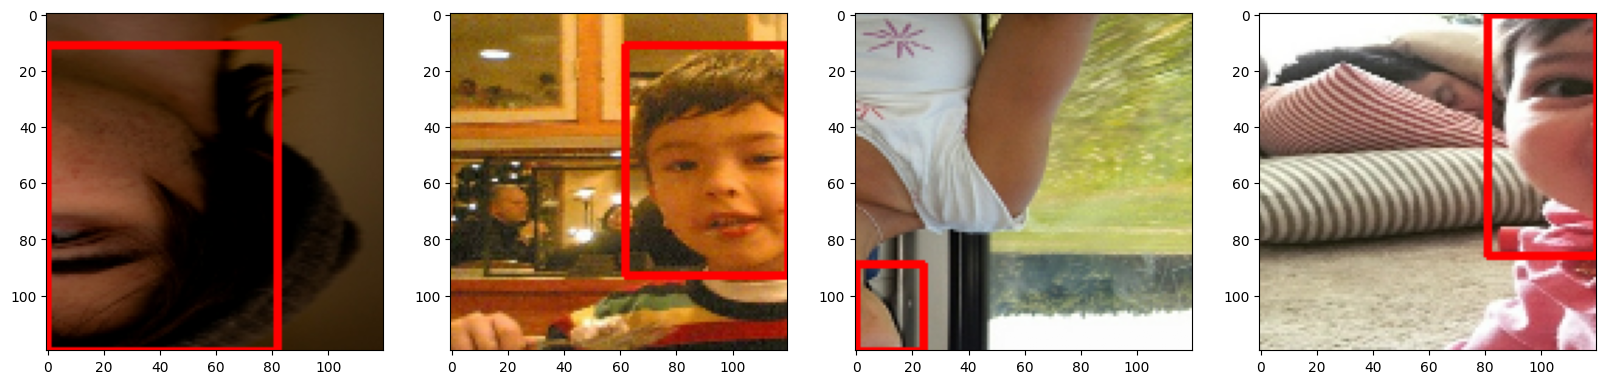

In [360]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                  (255,0,0), 2)

    ax[idx].imshow(sample_image)


# 8. Build Deep Learning using the Functional API

### 8.1 Import Layers and Base Network

In [324]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### 8.2 Download VGG16

In [325]:
vgg = VGG16(include_top=False)

In [326]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

### 8.3 Build instance of Network

In [327]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [362]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.      , 0.3545  , 0.543   , 1.      ],
        [0.5312  , 0.6357  , 1.      , 1.      ],
        [0.439   , 0.      , 1.      , 0.4175  ],
        [0.      , 0.6426  , 0.1207  , 1.      ],
        [0.      , 0.001028, 0.88    , 0.4307  ],
        [0.1956  , 0.53    , 0.875   , 1.      ],
        [0.      , 0.      , 0.4966  , 0.5474  ],
        [0.01855 , 0.3052  , 0.7715  , 0.992   ]], dtype=float16))

### 8.4 Test out Neural Network

In [328]:
facetracker = build_model()

In [329]:
facetracker.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 3, 3, 512) │ 14,714,688 │ input_layer_11[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 1)         │      2,049 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 4)         │      8,196 │ dense_18[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [330]:
X, y = train.as_numpy_iterator().next()

In [331]:
X.shape

(8, 120, 120, 3)

In [332]:
classes, coords = facetracker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


In [333]:
classes, coords

(array([[0.53574044],
        [0.501053  ],
        [0.50502205],
        [0.4313641 ],
        [0.5405087 ],
        [0.5626554 ],
        [0.5486509 ],
        [0.4884049 ]], dtype=float32),
 array([[0.51044697, 0.4773434 , 0.34204546, 0.5590759 ],
        [0.58569163, 0.4191879 , 0.3613821 , 0.45483464],
        [0.52052927, 0.41144678, 0.40117455, 0.5212415 ],
        [0.46518093, 0.35904646, 0.32892177, 0.5486779 ],
        [0.498437  , 0.4612446 , 0.2991615 , 0.42927322],
        [0.5912146 , 0.39925227, 0.32485595, 0.5225245 ],
        [0.5524382 , 0.34650445, 0.4660383 , 0.540972  ],
        [0.58974105, 0.4095632 , 0.37702277, 0.55280477]], dtype=float32))

# 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

In [334]:
batches_per_epoch = len(train)  
lr_decay = (1. / 0.75 - 1) / batches_per_epoch


In [335]:
initial_learning_rate = 0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=batches_per_epoch, decay_rate=0.75, staircase=False
)

In [336]:
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

### 9.2 Create Localization Loss and Classification Loss

In [337]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [338]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### 9.3 Test out Loss Metrics

In [364]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=10.386926>

In [365]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.66829264>

In [366]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=10.386926>

# 10. Train Neural Network

### 10.1 Create Custom Model Class

In [367]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [368]:
model = FaceTracker(facetracker)

In [369]:
model.compile(opt, classloss, regressloss)

### 10.2 Train

In [370]:
logdir='logs'

In [371]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [372]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30


ValueError: Cannot take the length of shape with unknown rank.

### 10.3 Plot Performance

In [164]:
hist.history

NameError: name 'hist' is not defined

NameError: name 'hist' is not defined

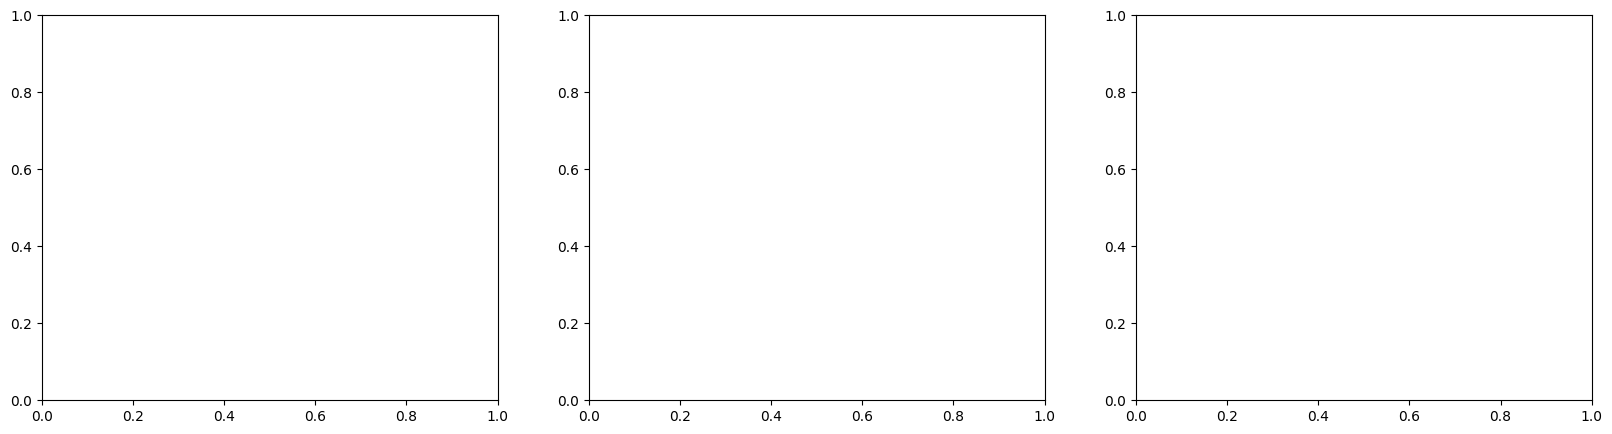

In [165]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

### 11.1 Make Predictions on Test Set

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
test_sample = test_data.next()

In [ ]:
yhat = facetracker.predict(test_sample[0])

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

### 11.2 Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
facetracker.save('facetracker.h5')

In [ ]:
facetracker = load_model('facetracker.h5')

### 11.3 Real Time Detection

In [ ]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()